In [19]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

In [20]:
# Import dataset
df = pd.read_csv('segmentation data.csv')
df.drop('ID', axis=1, inplace=True)
df.head(10)

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0,0,67,2,124670,1,2
1,1,1,22,1,150773,1,2
2,0,0,49,1,89210,0,0
3,0,0,45,1,171565,1,1
4,0,0,53,1,149031,1,1
5,0,0,35,1,144848,0,0
6,0,0,53,1,156495,1,1
7,0,0,35,1,193621,2,1
8,0,1,61,2,151591,0,0
9,0,1,28,1,174646,2,0


In [21]:
# Remove outliers
from pandas.core.dtypes.common import is_numeric_dtype


def remove_outlier(df_in):
    df_out = pd.DataFrame()
    for col in list(df_in.columns):
        if is_numeric_dtype(df_in[col]):
            q1 = df_in[col].quantile(0.25)
            q3 = df_in[col].quantile(0.75)

            iqr = q3 - q1
            up = q3 + (iqr * 1.5)
            down = q1 - (iqr * 1.5)

            df_out = df_in.loc[(df_in[col] > down) & (df_in[col] < up)]
    return df_out


df = remove_outlier(df)
df.head(10)

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0,0,67,2,124670,1,2
1,1,1,22,1,150773,1,2
2,0,0,49,1,89210,0,0
3,0,0,45,1,171565,1,1
4,0,0,53,1,149031,1,1
5,0,0,35,1,144848,0,0
6,0,0,53,1,156495,1,1
7,0,0,35,1,193621,2,1
8,0,1,61,2,151591,0,0
9,0,1,28,1,174646,2,0


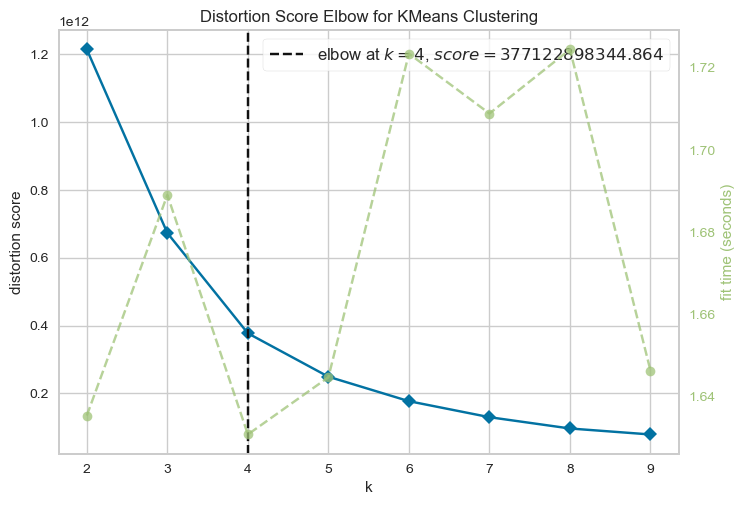

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [22]:
# Find K
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

kMeansC = KMeans(random_state=85)
vis = KElbowVisualizer(kMeansC, k=(2, 10))
vis.fit(df)
vis.show()

Silhouette Score K-Means for  2  clusters : 0.5834469001696239
Silhouette Score K-Means for  3  clusters : 0.5123353685080522
Silhouette Score K-Means for  4  clusters : 0.5428531732146846
Silhouette Score K-Means for  5  clusters : 0.5401417522540799
Silhouette Score K-Means for  6  clusters : 0.5437296022534126
Silhouette Score K-Means for  7  clusters : 0.5304517746044816
Silhouette Score K-Means for  8  clusters : 0.5405601292139715
Silhouette Score K-Means for  9  clusters : 0.5336771558851476
Silhouette Score K-Means for  10  clusters : 0.5360218271158751


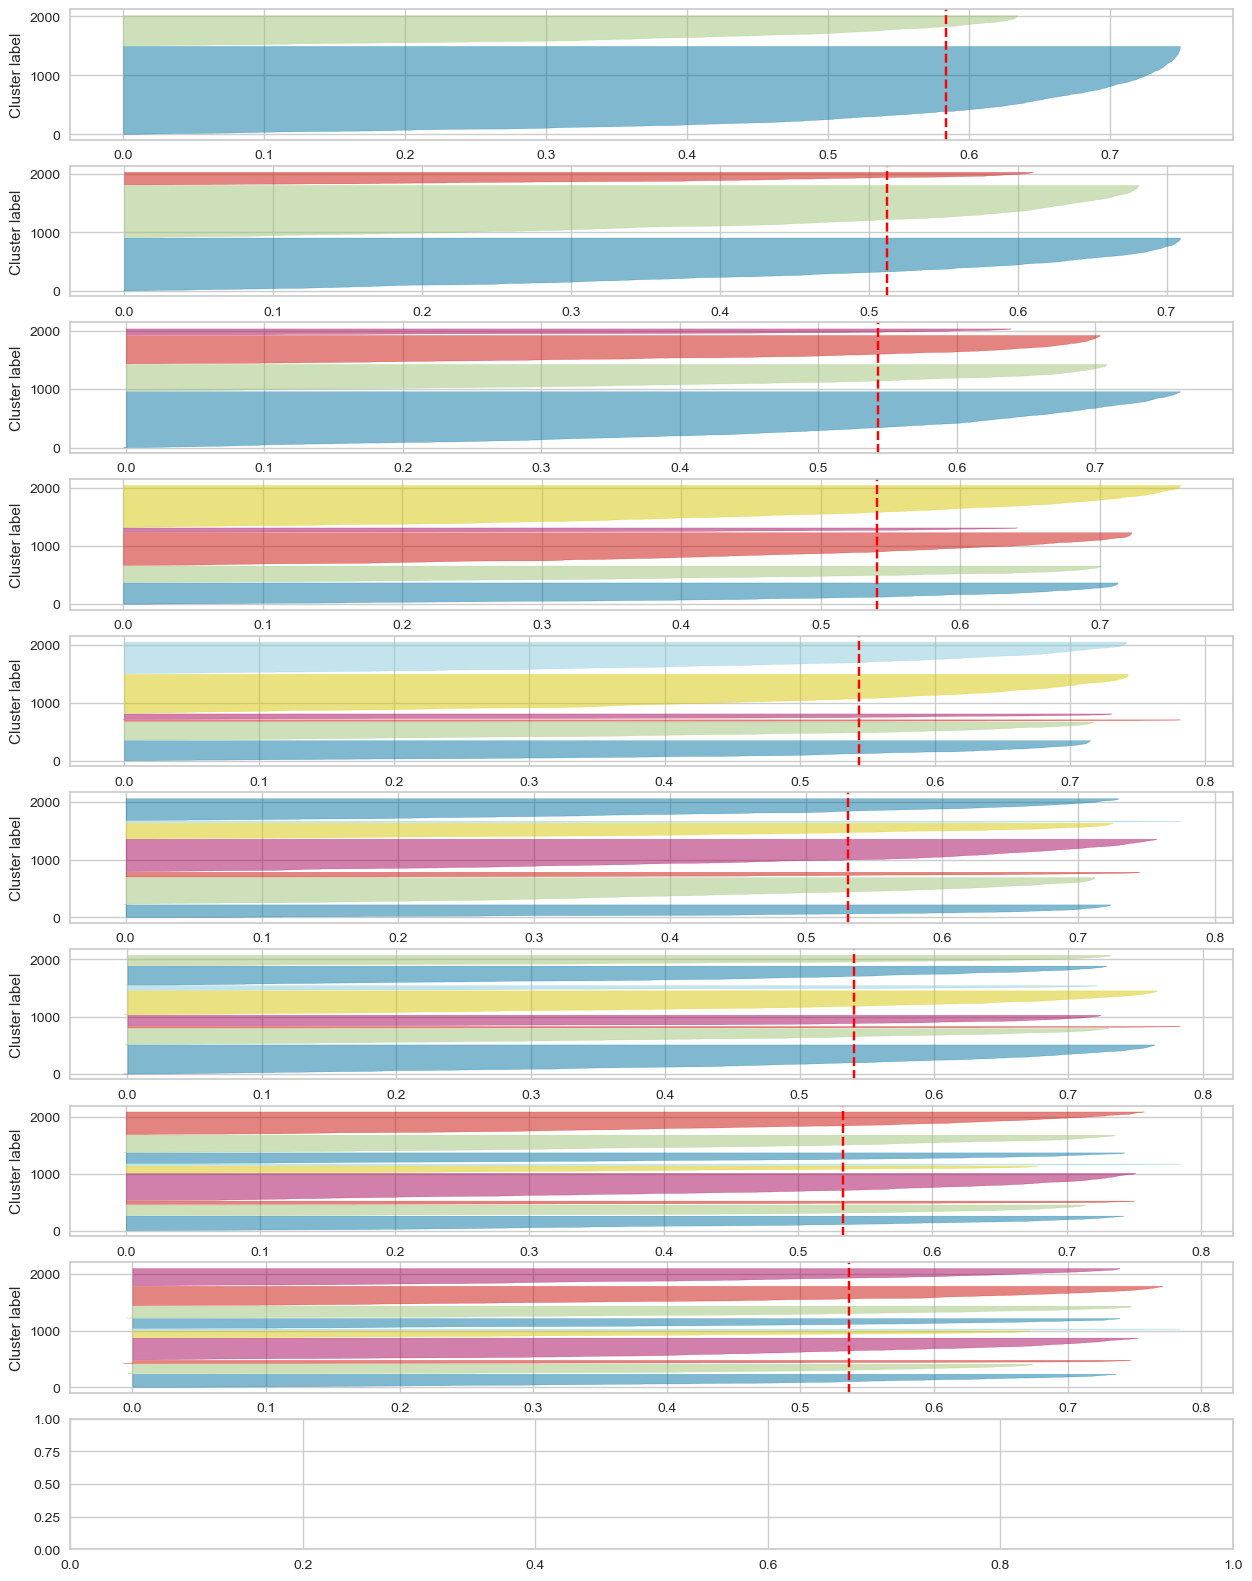

In [23]:
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(10, 1, figsize=(15, 20))
for k in np.arange(2, 11):
    kMeansC = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=200, random_state=85)
    KM_clusters = kMeansC.fit_predict(df)
    print("Silhouette Score K-Means for ", k, " clusters :", silhouette_score(df, KM_clusters))
    sil_vis = SilhouetteVisualizer(kMeansC, colors='yellowbrick', ax=ax[k - 2])
    sil_vis.fit(df)
    ax[k - 2].set(xlabel="Silhouette Score of each samples", ylabel="Cluster label")

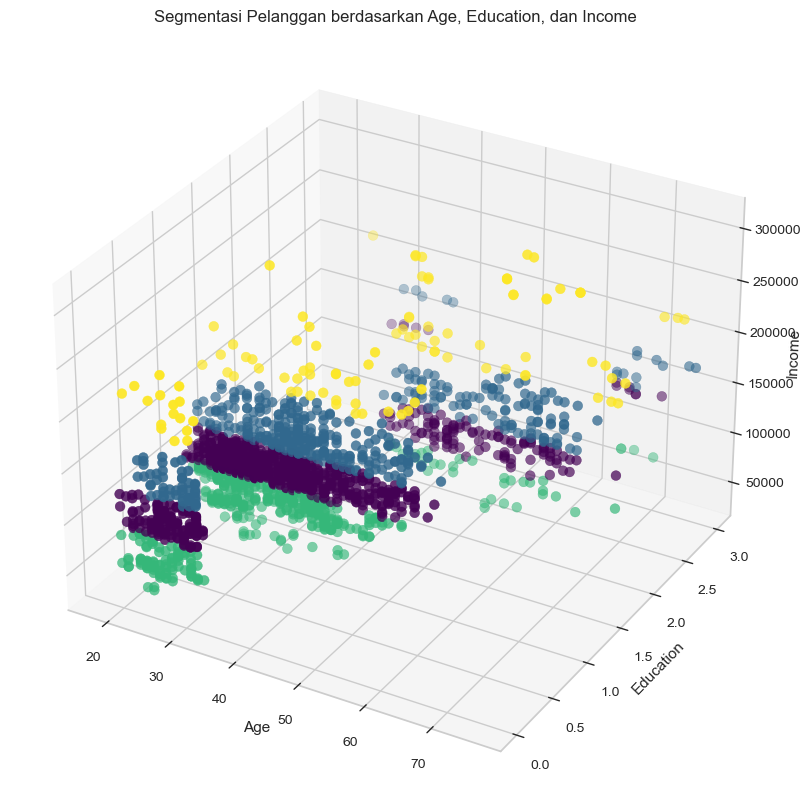

Silhouette Score K-Means: 0.543


In [24]:
# K-Means
KMEANS = KMeans(n_clusters=4, random_state=85)
KM_clusters = KMEANS.fit_predict(df)

fig3d = plt.figure(figsize=(10, 10))
ax = fig3d.add_subplot(111, projection='3d')
ax.scatter(df['Age'], df['Education'], df['Income'], cmap='viridis', c=KM_clusters, s=50)
ax.set_xlabel('Age')
ax.set_ylabel('Education')
ax.set_zlabel('Income')

plt.title('Segmentasi Pelanggan berdasarkan Age, Education, dan Income')
plt.show()

print("Silhouette Score K-Means: %0.3f" % silhouette_score(df, KM_clusters))

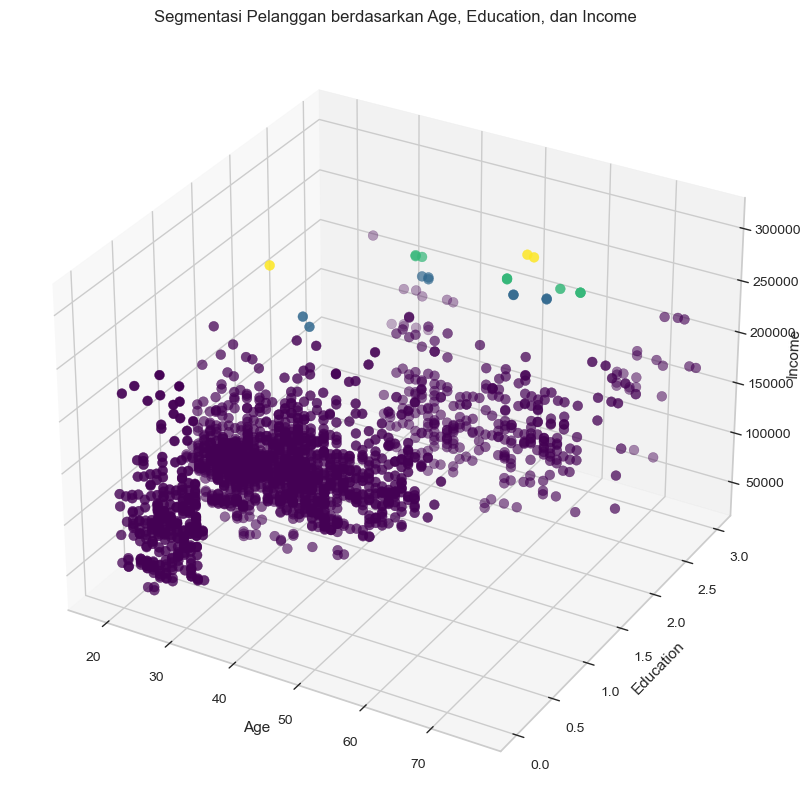

Silhouette Score Agglomerative: 0.704


In [25]:
# Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering

AGG = AgglomerativeClustering(n_clusters=4, linkage='single')
AGG_clusters = AGG.fit_predict(df)

fig3d = plt.figure(figsize=(10, 10))
ax = fig3d.add_subplot(111, projection='3d')
ax.scatter(df['Age'], df['Education'], df['Income'], cmap='viridis', c=AGG_clusters, s=50)
ax.set_xlabel('Age')
ax.set_ylabel('Education')
ax.set_zlabel('Income')

plt.title('Segmentasi Pelanggan berdasarkan Age, Education, dan Income')
plt.show()

print("Silhouette Score Agglomerative: %0.3f" % silhouette_score(df, AGG_clusters))

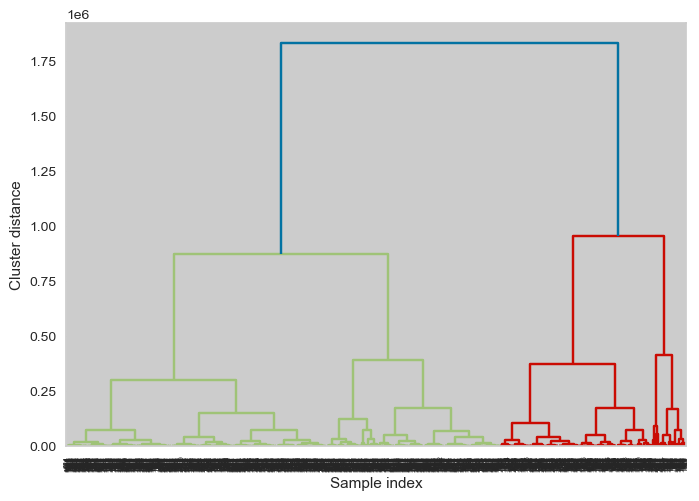

In [26]:
# Cluster Visualization
from scipy.cluster.hierarchy import dendrogram, linkage

linkage_array = linkage(df, method='ward')
dendrogram(linkage_array)

plt.xlabel("Sample index")
plt.ylabel("Cluster distance")
plt.show()

In [27]:
## [ Questions and Answers ]
## 1. Berapakah jumlah klaster yang optimal untuk dataset tersebut? 4
## 2. Model klasterisasi apa yang paling cocok digunakan untuk kasus tersebut? Agglomerative Clustering dengan linkage single.

## [ Author ]
## Benidiktus Violaz Morello Anjolie - 210711385